In [1]:
import pandas as pd 
import seaborn as sns 
import matplotlib.pyplot as plt
import plotly.express as px
import numpy as np
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import Lasso
import warnings
warnings.filterwarnings("ignore")
import plotly
plotly.offline.init_notebook_mode

import plotly.io as pio
pio.renderers.default = "svg"


## 538 Ticket Price Data for 2014 NFL ticket prices

In [43]:
df = pd.read_csv('538ticketprices\\2014-average-ticket-price.csv')

In [44]:
# the dataset
df.head()

,Event,Division,"Avg TP, $"
0,Baltimore Ravens at Pittsburgh Steelers Ticket...,AFC North,202.0
1,Pittsburgh Steelers at Baltimore Ravens Ticket...,AFC North,199.0
2,Cleveland Browns at Pittsburgh Steelers Ticket...,AFC North,196.0
3,Cincinnati Bengals at Pittsburgh Steelers Tick...,AFC North,164.0
4,Pittsburgh Steelers at Cleveland Browns Ticket...,AFC North,148.0


In [45]:
# datatypes and missing values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 108 entries, 0 to 107
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Event      97 non-null     object 
 1   Division   96 non-null     object 
 2   Avg TP, $  96 non-null     float64
dtypes: float64(1), object(2)
memory usage: 2.7+ KB


In [46]:
# evaluate missing data
df.isna().sum()

Event        11
Division     12
Avg TP, $    12
dtype: int64

In [47]:
# dropping missing values
df.dropna(inplace = True)

# creating cleaned home/away team columns
df['Event'][0].split('at')[1]

df['Event'] = df['Event'].apply(lambda x: str(x))

df['home team'] = df['Event'].apply(lambda x: x.split(' at ')[1])

df['away team'] = df['Event'].apply(lambda x: x.split(' at ')[0])

df['event date'] = df['Event'].apply(lambda x: x.split(' on ')[1])

df['home team'] = df['home team'].apply(lambda x: x.split(' Tickets ')[0])
# converting event date to date time format
df['date']= pd.to_datetime(df['event date'].apply(lambda x: x.split(' ')[0]))

# renaming columns
df =df.rename(columns = {'Avg TP, $': 'Average Ticket Price'})

# dropping irrelevant columns
df = df.drop(columns = ['Event' , 'event date'])

# convert month to Datetime format
df['month'] = df['date'].dt.month

In [48]:
# top 10 most highest average ticket price for 2014 season
df.sort_values(by = 'Average Ticket Price', ascending = False).head(10)

,Division,Average Ticket Price,home team,away team,date,month
48,NFC North,423.0,Chicago Bears,Green Bay Packers,2014-09-28,9
72,NFC West,373.0,Seattle Seahawks,San Francisco 49ers,2014-12-14,12
49,NFC North,265.0,Green Bay Packers,Chicago Bears,2014-11-09,11
73,NFC West,264.0,San Francisco 49ers,Seattle Seahawks,2014-11-27,11
24,AFC West,241.0,Denver Broncos,San Diego Chargers,2014-10-23,10
60,NFC East,236.0,Philadelphia Eagles,Dallas Cowboys,2014-12-14,12
61,NFC East,228.0,New York Giants,Dallas Cowboys,2014-11-23,11
74,NFC West,220.0,Seattle Seahawks,St Louis Rams,2014-12-28,12
62,NFC East,219.0,Dallas Cowboys,Philadelphia Eagles,2014-11-27,11
50,NFC North,218.0,Chicago Bears,Minnesota Vikings,2014-11-16,11


In [49]:
# evaluating teams with highest average ticket price
top5 = df.groupby('home team').mean().reset_index().sort_values(by = 'Average Ticket Price', ascending = False).head()
top5away = df.groupby('away team').mean().reset_index().sort_values(by = 'Average Ticket Price', ascending = False).head()

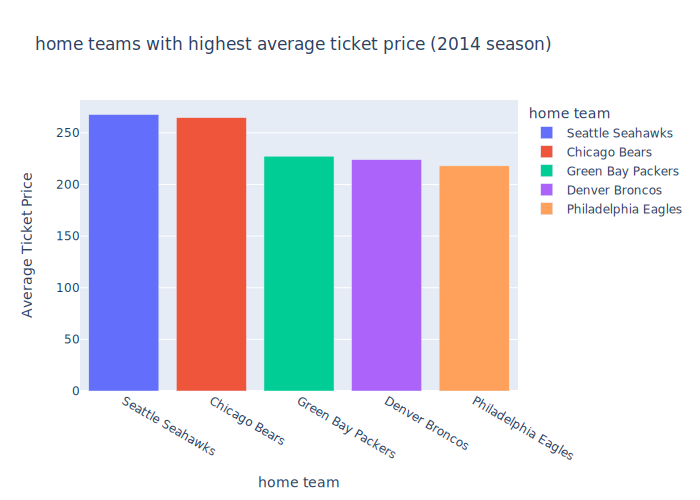

In [50]:
fig = px.bar(top5, x = 'home team', y = 'Average Ticket Price', color = 'home team' ,
       title = 'home teams with highest average ticket price (2014 season)')
fig.show('svg')

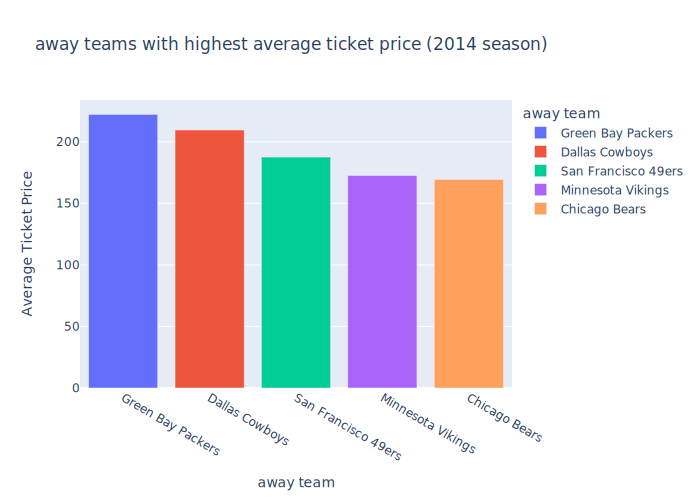

In [51]:
fig = px.bar(top5away, x ='away team', y = 'Average Ticket Price',
       color = 'away team' , title = 'away teams with highest average ticket price (2014 season)')

fig.show('svg')

In [52]:
# of the top 10 teams with highest average ticket sale in 2014 , 3 are in the NFC east 
df.groupby(['Division', 'home team']).mean()['Average Ticket Price'].sort_values(ascending = False)\
.head(5).reset_index()['Division'].value_counts()

NFC North    2
NFC West     1
AFC West     1
NFC East     1
Name: Division, dtype: int64

## Analysis :

The Graphs above display the most expensive NFL teams to watch during the 2014 season,

Greenbay and Chicago games were overall the most expensive tickets for the season (both home and away)
 
Seahawks dominates the home games sales, most likely due to thier dominate record and winning the division
 
Minnesota away tickets are  likely more expensive than other  teams, due to playining in the NFC North Division and the Bears and Packers the second and third most expensive home games (historical stadiums).  




In [53]:
divisionbymonth = df.groupby(['Division', 'month']).mean()
b = divisionbymonth.reset_index()

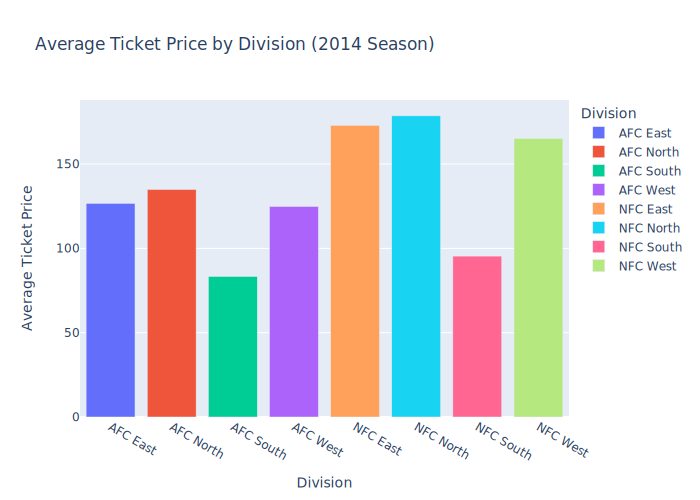

In [54]:
fig = px.bar(df.groupby('Division')['Average Ticket Price'].mean().reset_index(), x = 'Division',
       y= 'Average Ticket Price', color = 'Division', title = 'Average Ticket Price by Division (2014 Season)')
fig.show('svg')

## Analysis 

the NFC north has highest average, supports above conclusions, historical stadiums (lambeau/soldier field). 

NFC East contained, Philadephia, Dallas, and Washinton are all older organizations with established fan bases. 

the Average ticket price in AFC/NFC south home game is Half the average of a NFC North game home game.

NFC diviions have an overall higher average ticket price

identified differences between expected ticket prices and division 


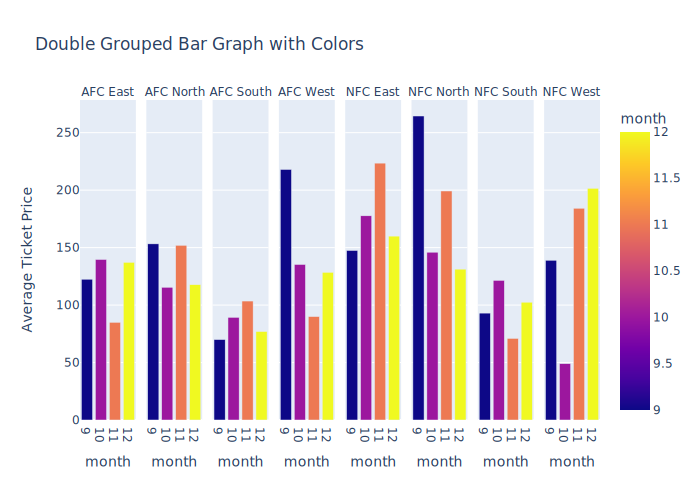

In [55]:
fig = px.bar(b, x='month', y='Average Ticket Price', color='month', facet_col = 'Division',
             title='Double Grouped Bar Graph with Colors')

fig.for_each_annotation(lambda a: a.update(text=a.text.split("=")[-1]))             




fig.show('svg')

## Analysis 

This visualization breaks down each division and the ticket sales within the month 

You can see the disporportion that september has within the AFC West and NFC North Divisions. there is signifigantly higher 
demand during this month. 

With additional season data (2014 -2023), I would be interested to see if this trend would cotinue 


## StubHub Ticket Pricing Evaluation

Data collected and publicly available at Epsilon670 Github

Goal is to use Regression models to evaluate which ticket attributes have the highest effect on Average Markup.

Try to Accurately predict expected markup with event attributes


In [17]:
df = pd.read_csv('MasterTicketData.csv')

In [18]:
# list of Event Attributes

df.columns

Index(['event_id', 'date', 'artist', 'venue', 'min_price', 'max_price',
       'total_postings', 'total_tickets', 'city', 'state', 'ticket_vendor',
       'face_value', 'sold_out', 'sk_artist_id', 'days_to_show', 'num_blogs',
       'num_news', 'num_reviews', 'discovery', 'familiarity', 'hotttnesss',
       'num_years_active'],
      dtype='object')

In [19]:

# creating Target variable for ticket price (Markup)  
# minimum ticket price - face value
# maximum ticket price - face value
# standardizing numerical variables for modelling

df= df[df['face_value'].str.contains('\$')]
df['face_value'] = df['face_value'].map(lambda x: x.strip('$'))
df['face_value'] = df['face_value'].apply(lambda x: float(x))
df['markup'] = df['min_price'] - df['face_value']
df['log_markup'] = np.log(df['markup'])

df.dropna(inplace = True)

# cleaning dataset for modelling

df = df.loc[df['discovery'] != 'error_5']
df['num_blogs'] = pd.to_numeric(df['num_blogs'], errors = 'ignore')
df['num_news'] = pd.to_numeric(df['num_news'], errors = 'ignore')
df['num_reviews'] =df['num_reviews'].apply(lambda x: float(x))
df['discovery'] = df['discovery'].apply(lambda x: float(x))
df['familiarity'] =df['familiarity'].apply(lambda x:float(x))
df['hotttnesss']= df['hotttnesss'].apply(lambda x: float(x))
df['num_years_active'] = df['num_years_active'].apply(lambda x: float(x))
df.dropna(inplace = True)

In [20]:
model1 = ['artist', 'venue', 'city', 'state', 'ticket_vendor',
        'sold_out', 'num_blogs',
       'num_news', 'num_reviews', 'discovery', 'familiarity', 'hotttnesss',
       'num_years_active', 'total_postings','total_tickets', 'days_to_show']


model_no_artists = ['venue', 'city', 'state', 'ticket_vendor',
        'sold_out', 'num_blogs',
       'num_news', 'num_reviews', 'discovery', 'familiarity', 'hotttnesss',
       'num_years_active', 'total_postings','total_tickets',  'days_to_show']

model_no_artists_no_vendor = ['venue', 'city', 'state',
        'sold_out', 'num_blogs',
       'num_news', 'num_reviews', 'discovery', 'familiarity', 'hotttnesss',
       'num_years_active', 'total_postings','total_tickets', 'days_to_show']


In [21]:
# target - Predicting stubhub ticket price markups
y = df['markup']
y_scaled = df['log_markup']

# Constructing feature matrix 
X = df[model1]

## Linear Regression

In [22]:
numeric_features = X.select_dtypes(include=['int64', 'float64']).columns
categorical_features = X.select_dtypes(include=['object']).columns

In [23]:
numeric_transformer = Pipeline(steps=[
    ('ss', StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ('ohe', OneHotEncoder(handle_unknown='ignore',))
])

preprocessor = ColumnTransformer(
    transformers=[
        ('numerical', numeric_transformer, numeric_features),
        ('cats', categorical_transformer, categorical_features)
    ])

# Construct the pipeline and linear regression model 
pipeline = Pipeline(steps=[('preprocess', preprocessor),
                           ('model', LinearRegression())])


# split data for evaluation
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=14)



# compute feature wieghts
pipeline.fit(X_train, y_train)

# predict markup prices
y_pred = pipeline.predict(X_test)

# evaluating the model 
mse = mean_squared_error(y_test, y_pred)
print('mean squared eroror is {}'.format(mse))
print('R^2 score {}'.format(pipeline.score(X_test,y_test)))
print('unable to accurately predict markup price')

mean squared eroror is 2501.319211242458
R^2 score 0.049710560792669445
unable to accurately predict markup price


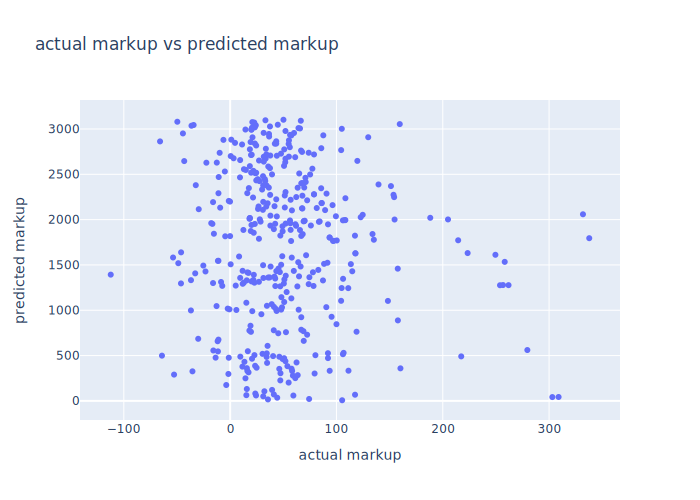

In [24]:

fig = px.scatter(y_test ,y_pred, title = 'actual markup vs predicted markup', labels={
                     "index": "predicted markup",
                     "x": "actual markup",
                    
                 },)
fig.show('svg')

In [25]:
## lasso Regression for importances

pipeline_lasso = Pipeline(steps=[('preprocess', preprocessor),
                           ('model', Lasso())])


# split data for evaluation
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=14)



# compute feature wieghts
pipeline_lasso.fit(X_train, y_train)

# predict markup prices
y_pred = pipeline_lasso.predict(X_test)

# evaluating the model 
mse = mean_squared_error(y_test, y_pred)
print('Lasso mean squared eroror is {}'.format(mse))
print('Lasso R^2 score {}'.format(pipeline_lasso.score(X_test,y_test)))
print('Capturing 50% of variability in Markup price')

cat_names = pipeline.named_steps['preprocess']\
    .named_transformers_['cats'].named_steps['ohe'].get_feature_names()
feat_names =list(cat_names) + ['num_blogs',
       'num_news', 'num_reviews', 'discovery', 'familiarity', 'hotttnesss',
       'num_years_active', 'total_postings','total_tickets','days_to_show']


lasso_coef_df =  pd.DataFrame(zip(feat_names,pipeline_lasso['model'].coef_)).\
sort_values(by = 1, ascending = False).rename(columns = {1: 'coefficent'})

Lasso mean squared eroror is 1276.3428607561327
Lasso R^2 score 0.5150978188098774
Capturing 50% of variability in Markup price


In [26]:
## evaluting import coefficents

lr_coef_df =  pd.DataFrame(zip(feat_names,pipeline['model'].coef_)).\
sort_values(by = 1, ascending = False).rename(columns = {1: 'coefficent'})

lr_coef_df



,0,coefficent
257,x0_La Ley,390.886165
309,x0_New Order,358.190622
170,x0_Floating Points,315.149602
72,x0_Blaqk Audio,303.046408
21,x0_Andre Nickatina,266.622138
...,...,...
99,x0_Caravan Palace,-158.606735
15,x0_All For The Hall,-167.591531
285,x0_Mayer Hawthorne,-185.243805
18,x0_Anders Osborne,-189.990798


In [27]:
lr_coef_df[~lr_coef_df[0].str.contains('x')]

,0,coefficent
720,familiarity,42.441004
717,num_news,24.176376
721,hotttnesss,15.487754
722,num_years_active,9.567902
724,total_tickets,2.117693
716,num_blogs,1.266936
725,days_to_show,-2.117693
719,discovery,-7.806437
718,num_reviews,-14.487658
723,total_postings,-26.374012


## Analysis: 

The model coefficents supports that the artist is the primary driver of ticket price fluctuations
Use model to identify artist that are both traditionally expensive and have historically experienced markups. 
 f
Artist metrics such as amiliarity/hottnesss, how long they have been preforming for, and social prescence all correlate to higher average ticket prices 

While the accuracy of our model does not allow to be used to as accurate markup prediction tool. it does give insight into the metrics driving sales price and what to look for when determining prices. 


Using Regression techniques like this help identify important metrics, and look further into what might may have indirect effects to ticket sales (ex. number of reviews or posting for event)

 

## Random Forest Classifier

In [56]:
numeric_features = X.select_dtypes(include=['int64', 'float64']).columns
categorical_features = X.select_dtypes(include=['object']).columns
numeric_transformer = Pipeline(steps=[
    ('ss', StandardScaler())
])
categorical_transformer = Pipeline(steps=[
    ('ohe', OneHotEncoder(handle_unknown='ignore'))
])
preprocessor = ColumnTransformer(
    transformers=[
        ('numerical', numeric_transformer, numeric_features),
        ('cats', categorical_transformer, categorical_features)
    ])
rf_pipeline = Pipeline(steps=[('preprocess', preprocessor),
                           ('model', RandomForestRegressor())])
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=14)
rf_pipeline.fit(X_train, y_train)
y_pred = rf_pipeline.predict(X_test)
mse = mean_squared_error(y_test, y_pred)

print('mean squared error{}'.format(mse))
print('R^2 score{}'.format(rf_pipeline.score(X_test,y_test)))
print('average prediction error is about $935 off (not good)')
print('model captures 65% of variability in markup')

mean squared error937.5382482322
R^2 score0.6438148749093662
average prediction error is about $935 off (not good)
model captures 65% of variability in markup


In [57]:
rf_feat_df = pd.DataFrame(zip(feat_names, rf_pipeline['model'].feature_importances_))

In [58]:
rf_feat_df.head(10)

,0,1
0,x0_2Cellos,0.010903
1,x0_311,0.029905
2,x0_5 Seconds of Summer,0.008937
3,x0_A Great Big World,0.008898
4,x0_A Static Lullaby,0.023197
5,x0_AC/DC,0.041072
6,x0_Abbath,0.041004
7,x0_Above and Beyond,0.027318
8,x0_Above and Beyond Acoustic,0.078579
9,x0_Ace Frehley,0.049576


In [59]:
rf_feat_df[~rf_feat_df[0].str.contains('x')].sort_values(by = 1, ascending = False).rename(columns= {1: 'importance', 0:'metric'})

,metric,importance
718,num_reviews,7.399444e-03
724,total_tickets,1.567900e-03
725,days_to_show,1.084835e-03
717,num_news,7.443278e-04
723,total_postings,1.950926e-04
722,num_years_active,3.265165e-05
719,discovery,2.485833e-05
720,familiarity,6.674108e-06
721,hotttnesss,6.181964e-06
716,num_blogs,5.084564e-07


## Analysis: 

The feature importance above display the most import metrics in constructing Random Forest Regressor model. 
The value in the importance column cannot be interpreted as a coefficent of price, 
but still ranks the importance (higher the numeric value) of a metrics effect on predicting markup price.

Supports the coefficents from our linear Regression model where number of reviews, ticket availability, days to show all have signifigant effects on the average markup for an event. 


## Visualizing Model Results

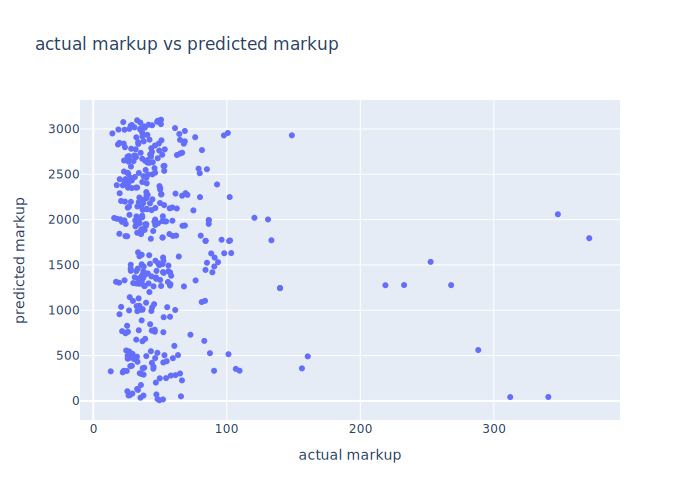

In [60]:
fig = px.scatter(y_test ,y_pred, title = 'actual markup vs predicted markup', labels={
                     "index": "predicted markup",
                     "x": "actual markup",
                    
                 },)
fig.show('svg')

In [61]:
Rf_model = pd.concat([X_test.reset_index(),pd.Series(y_pred)],1).rename(columns={0:'predicted markup'})

y_actual = y_test.reset_index().drop(columns ='index')

rf_model = pd.concat([Rf_model,y_actual],1)

rf_model['error'] = rf_model['markup'] - rf_model['predicted markup']

rf_error= rf_model.sort_values(by = 'error', ascending = False)


In [62]:
# Shows the specific events with the biggest different in actual vs predicted markup 
rf_error[['artist', 'predicted markup', 'markup', 'error']].head(5)

,artist,predicted markup,markup,error
205,Calvin Harris,41.8802,202.52,160.6398
203,Bane,66.8636,222.07,155.2064
109,Andy Grammer,68.5743,213.18,144.6057
269,Blood Sweat and Tears,46.3611,179.62,133.2589
248,Bonnie Raitt,102.4496,207.10,104.6504


## Conclusion: 

Overall the features provided in the dataset were unable to accuracly predict markup for a specific event. However it was able to identify import metrics  when determining a ticket price. With more time gathering data and selecting specific artists or subsets to focus my analysis on, I could potentially increase preditive power of my model and use custom build tools like these to make data driven decisions when setting ticket prices. 